In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import seaborn as sns

In [2]:
vdh_foodPermits = pd.read_csv('VDH_FoodPermits.csv')

vdh_foodPermits

,HealthDistrict,establishmentName,permitName,permitNumber,program,PermitType,status,RiskCategory,catering,commissary,...,inspectionFrequency,ApplicationDate,OriginalIssueDate,PermitIssueDate,ExpirationDate,FacilityAddress,city,zip,FIPSCode,LocalityName
0,EHD - Rappahannock,NaN,A-La-Carte by Weddings by Ginny,JCRS-5W9Q8L,Food Establishment,Restaurant/Caterer,Surrendered,1,NaN,NaN,...,NaN,2/12/2004,6/18/2004,6/18/2004,6/30/2005,NaN,NaN,NaN,NaN,NaN
1,EHD - Prince William,NaN,Chiyoshi,AJOS-ARKQPG,Food Establishment,Carry Out Food Service Only,Business Closed,3,NO,NO,...,NaN,9/22/2017,3/29/2018,4/1/2019,3/31/2022,NaN,NaN,NaN,NaN,NaN
2,EHD - Three Rivers,NaN,Monroe Bay Landing,JKAZ-59KLBD,Food Establishment,Restaurant,Surrendered,4,NaN,NaN,...,NaN,1/3/1994,2/10/1995,2/13/2003,2/28/2004,NaN,NaN,NaN,NaN,NaN
3,EHD - New River,NaN,Narrows High School-girls Basketball,ACOS-5NUP2H,Food Establishment,Temporary restaurant,Surrendered,NaN,NaN,NaN,...,NaN,6/25/2003,6/25/2003,7/4/2003,7/4/2003,NaN,NaN,NaN,NaN,NaN
4,EHD - Virginia Beach,NaN,No. One Chinese Restaurant,JLLD-5CLR4E,Food Establishment,Full Service Restaurant,Surrendered,4,NaN,NaN,...,NaN,7/1/2003,7/8/2003,7/1/2008,7/31/2009,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,EHD - Prince William,Wendy’s #6589,Wendy's #6589,#REF!,Food Establishment,NaN,Permitted,2,NO,NO,...,NaN,8/18/2021,10/6/2021,10/6/2021,10/31/2023,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8042,EHD - Prince William,Wendy’s #6589,Wendy's #139,JSUZ-55HQY2,Food Establishment,Fast Food Restaurant,Surrendered,2,NaN,NaN,...,6.0,9/10/2002,11/19/2002,12/1/2016,11/30/2017,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8043,EHD - Prince William,Wendy’s #6589,Wendy's #6589,AJOS-AMUM8G,Food Establishment,Fast Food Restaurant,Business Closed,NaN,NO,NO,...,NaN,5/17/2017,8/3/2017,6/1/2019,5/31/2021,2410 Prince William Pkwy,Woodbridge,22192,NaN,NaN
8044,EHD - Alleghany-Roanoke,3096 Colonial Avenue SW,Subway #63400 @ Virginia Western Community Col...,#REF!,Food Establishment,Fast Food Restaurant,Business Closed,1,NO,NO,...,6.0,7/25/2014,8/19/2014,9/1/2019,8/31/2020,3096 Colonial Avenue SW,Roanoke,24015,NaN,NaN


### Cleaning Dataset

In [3]:
# Considering the first 300 rows
clean_vdh = vdh_foodPermits.loc[0:300, 'HealthDistrict': 'RiskCategory']

# Switch object type to factor
clean_vdh['HealthDistrict'] = clean_vdh['HealthDistrict'].astype('string')

# replace NaN values from Establishment Name into thier permit Name for analysis purpose
clean_vdh['establishmentName'] = clean_vdh['establishmentName'].astype('string')
clean_vdh['establishmentName'] = clean_vdh['establishmentName'].fillna(clean_vdh['permitName'])

# Removed EHD from Health Districts for easy access of location/Districts
clean_vdh.HealthDistrict = clean_vdh.HealthDistrict.map(lambda b: b.replace("EHD - ", ""))

# Remove columns that are insignificant
clean_vdh = clean_vdh.drop(columns=["permitNumber", "program", "status", "RiskCategory"])
clean_vdh

,HealthDistrict,establishmentName,permitName,PermitType
0,Rappahannock,A-La-Carte by Weddings by Ginny,A-La-Carte by Weddings by Ginny,Restaurant/Caterer
1,Prince William,Chiyoshi,Chiyoshi,Carry Out Food Service Only
2,Three Rivers,Monroe Bay Landing,Monroe Bay Landing,Restaurant
3,New River,Narrows High School-girls Basketball,Narrows High School-girls Basketball,Temporary restaurant
4,Virginia Beach,No. One Chinese Restaurant,No. One Chinese Restaurant,Full Service Restaurant
...,...,...,...,...
296,Western Tidewater,Franklin Church of God - 2012 Summer Food Serv...,Southampton County High School,Summer Food Service Program Feeding Site
297,Western Tidewater,Franklin Church of God - 2012 Summer Food Serv...,Franklin Church of God,Summer Food Service Program Kitchen
298,Richmond,Soul Bistro Home of the Heavy Plates,Soul Bistro Home of the Heavy Plates,Fast Food Restaurant
299,Richmond,Tropicana Restaurant & Catering,Tropicana Restaurant & Catering,Full Service Restaurant/Caterer


### API and Mapping health district to county level

In [4]:
# First step: Obtain an API key from the US Census Bureau's website
api_key = 'af7d72e7b5f0ccde2289b15f56500e899c752023'

In [5]:
# Second step: Install the census and us Python packages

In [6]:
# Third step: Import the necessary packages in this Python script
from census import Census
from us import states

In [7]:
# Fourth step: Set up API key by creating an instance of the Census class and passing in API key as a parameter
c = Census(api_key)

In [8]:
# Final steps: Obtain a list of the counties in Virginia from the Census Bureau API
# Use method to get a list of all available tables in the API
counties = c.acs5.state_county_tract("NAME", state_fips = states.VA.fips, county_fips = "*", tract="*")

In [9]:
# The above will return a list of dictionaries, where each dictionary corresponds 
# to a county and contains the county's name and FIPS code.

# Federal Information Processing System
# FIPS code: FIPS codes are numbers which uniquely identify geographic areas.

In [10]:
# Map the health districts to corresponding counties
# To do this, you can create a dictionary that maps the FIPS codes to their corresponding counties, and 
# then use this dictionary to match each health district to its corresponding county.

county_dict = {}
for county in counties:
    county_dict[county['county']] = county['NAME']

# This creates a dictionary where the keys are the county FIPS codes and the values are the county names.

In [11]:
# Add a new column to your dataset that contains the county name for each health district. 

In [12]:
# Create a new column to store the corresponding county for each health district


In [13]:
# Create a new column that contains the county name for each restaurant permit
#clean_vdh['county'] = clean_vdh['health_district'].map(district_county_table)

### Cleaning second Dataset and Merging

In [14]:
locality = pd.read_csv('Locality-to-HD-to-HPR.csv')
locality = locality.rename(columns={'Unnamed: 0': 'CityCounty', 'Unnamed: 1': 'CountyFIPS','Unnamed: 2': 'HealthDistrict'})
locality = locality.drop(columns=["Unnamed: 3"])
locality = locality.drop([0,1])
locality

,CityCounty,CountyFIPS,HealthDistrict
2,Accomack,51001,Eastern Shore
3,Albemarle,51003,Thomas Jefferson
4,Alexandria,51510,Alexandria
5,Alleghany,51005,Alleghany
6,Amelia,51007,Piedmont
...,...,...,...
132,Williamsburg,51830,Peninsula
133,Winchester,51840,Lord Fairfax
134,Wise,51195,Lenowisco
135,Wythe,51197,Mount Rogers


In [15]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


merged = pd.merge(clean_vdh, locality, on="HealthDistrict")
merged = merged.drop_duplicates(subset=["establishmentName", "permitName"])
merged

,HealthDistrict,establishmentName,permitName,PermitType,CityCounty,CountyFIPS
0,Rappahannock,A-La-Carte by Weddings by Ginny,A-La-Carte by Weddings by Ginny,Restaurant/Caterer,Caroline,51033
10,Rappahannock,"Gabby's Seafood, LLC","Gabby's Seafood, LLC",Mobile Food Unit,Caroline,51033
15,Rappahannock,Grioli’s Italian Bistro,Grioli's Italian Bistro,Full Service Restaurant,Caroline,51033
20,Rappahannock,Ponderosa,Ponderosa,Full Service Restaurant,Caroline,51033
30,Rappahannock,Virginia Barbeque Company,Virginia Barbeque Company,Full Service Restaurant,Caroline,51033
35,Rappahannock,Speedy’s Mart (Ladysmith),Speedy's Mart (Ladysmith),Restaurant,Caroline,51033
40,Rappahannock,Bernice Varieties,Bernice Varieties,Caterer,Caroline,51033
50,Rappahannock,Dinty Moore’s,Dinty Moore's,Full Service Restaurant,Caroline,51033
55,Rappahannock,"Granny’s ""Home Cookin""","Granny's ""Home Cookin""",Full Service Restaurant,Caroline,51033
60,Rappahannock,"John’s Place, LLC.",John's Place,Full Service Restaurant,Caroline,51033


In [16]:
data = merged
print(data.CityCounty.unique())

['Caroline' 'Manassas City' 'Essex' 'Floyd' 'Virginia Beach' 'Fairfax'
 'Norfolk' 'Portsmouth' 'Bland' 'Augusta' 'Arlington' 'James City'
 'Dinwiddie' 'Buchanan' 'Charles City' 'Danville' 'Franklin City'
 'Richmond City' 'Franklin County' 'Amelia' 'Alexandria']


### What approach can be used for this dataset ? 

### The accuracy rate is 14 % which is pretty low . What can we do to make it better ? 

In [17]:
# import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Create some data and fit a KNN classifier
# X_train = np.random.randn(100, 2)
# y_train = np.random.randint(0, 2, 100)
# X_test = np.random.randn(50, 2)
# y_test = np.random.randint(0, 2, 50)
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(X_train, y_train)

# # Compute the confusion matrix on the test set
# y_pred = clf.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# # Plot the confusion matrix as a heatmap
# sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.show()


### Obseity Rate 

In [18]:
health_ranking_2022 = pd.read_excel("2022_Clean_County_Data.xlsx")
#droping the unwanted columns 
health_ranking_2022 = health_ranking_2022.iloc[:, :-2]
# removing unnecessary columns 
health_ranking_2022 = health_ranking_2022 .drop('FIPS', axis= 1) 
health_ranking_2022

,County,Obesity Rate,Median Household Income,Percent Rural,Food Environment Index
0,Accomack,40.0,44127,100.0,8.5
1,Albemarle,27.7,79708,45.0,8.8
2,Alleghany,36.4,52281,52.4,7.2
3,Amelia,35.2,70511,100.0,8.6
4,Amherst,36.1,61111,63.7,8.4
5,Appomattox,35.6,55152,100.0,8.6
6,Arlington,23.5,125004,0.0,9.3
7,Augusta,32.5,67698,66.4,8.4
8,Bath,35.2,56165,100.0,7.8
9,Bedford,33.4,70004,78.4,8.9


## Checking the percentage of missing values

In [19]:
#getting the sum of missing values from each column 
missing_val = health_ranking_2022.isna().sum()
missing_val

County                     0
Obesity Rate               0
Median Household Income    0
Percent Rural              0
Food Environment Index     5
dtype: int64

## Dealing with missing values

In [20]:
# removing the rows with nan values since we don't want to make any pressumptions 
health_ranking_2022 = health_ranking_2022.dropna()
health_ranking_2022

,County,Obesity Rate,Median Household Income,Percent Rural,Food Environment Index
0,Accomack,40.0,44127,100.0,8.5
1,Albemarle,27.7,79708,45.0,8.8
2,Alleghany,36.4,52281,52.4,7.2
3,Amelia,35.2,70511,100.0,8.6
4,Amherst,36.1,61111,63.7,8.4
5,Appomattox,35.6,55152,100.0,8.6
6,Arlington,23.5,125004,0.0,9.3
7,Augusta,32.5,67698,66.4,8.4
8,Bath,35.2,56165,100.0,7.8
9,Bedford,33.4,70004,78.4,8.9


In [21]:
#checking if any NaN value exists 
missing_val = health_ranking_2022.isna().sum()
missing_val

County                     0
Obesity Rate               0
Median Household Income    0
Percent Rural              0
Food Environment Index     0
dtype: int64

## Data Analysis

## Visualizing datasets

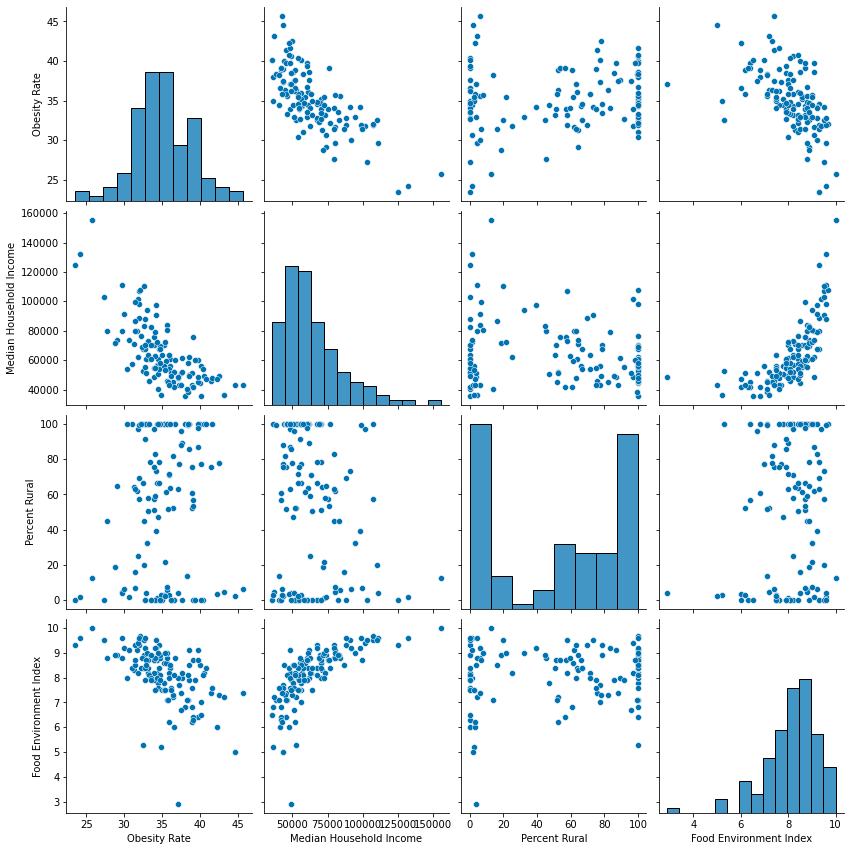

In [22]:
sns.set_palette('colorblind')
sns.pairplot(data=health_ranking_2022, height=3)

### Distribution of the target variable 

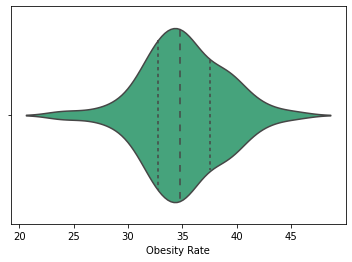

In [23]:
# violin plot
sns.violinplot(x=health_ranking_2022['Obesity Rate'], inner="quartile", color="#36B37E");

We can see from the obesity fall between 33 to  38 . The dashed lines represents the three quartiles . 

####  Visualizing the datasets

In [24]:
# Performed one-hot encoding on the 'County' ( categorical) variable
county_dummies = pd.get_dummies(health_ranking_2022['County'])

# Combine the one-hot encoded variables with the other independent variables
X = pd.concat([health_ranking_2022[['Median Household Income','Percent Rural']]], axis=1)

# Define the dependent variable
y = health_ranking_2022['Obesity Rate']

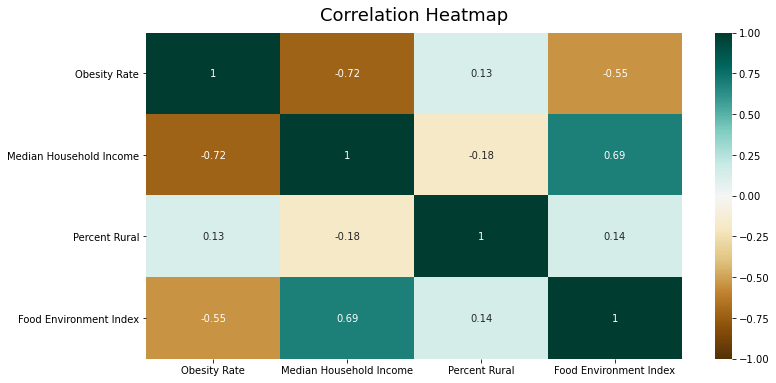

In [25]:
## Pearson correlation coefficient matrix to check multicollinearity 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(health_ranking_2022.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

The above Correlation map shows a negative correlation of -0.72 between obesity and income. As income increases, obesity tends to decrease, and vice versa.
The correlation coefficient of 0.13 between obesity and living in a rural area suggests a weak positive correlation between these two variables.However, the correlation does not imply causation.


In [26]:

# # get ANOVA table as R like output
# import statsmodels.api as sm
# from statsmodels.formula.api import ols


# # Fit the ANOVA model
# model = ols('Obsesity ~ C(County)', data=df).fit()

# # Print the ANOVA table
# anova_table = sm.stats.anova_lm(model, typ=2)
# print(anova_table)


###  Splitting the datasets into training and testing datasets

In [27]:
#splitting the dataset into 70:30 ratio
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print the shape of the training and testing sets
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)
# X_train shape: (700, n_features)
# y_train shape: (700,)
# X_test shape: (300, n_features)
# y_test shape: (300,)


### Regression model 

In [28]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Fit the model and print the results
model = linear_model.LinearRegression().fit(X_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 42.76555142146523
Coefficients: [-0.00012265 -0.00512131]


In [29]:
y_pred_mlr= model.predict(X_test)
print(y_pred_mlr )

[33.79694152 30.57996106 36.72370301 34.7392829  38.25828793 36.29060612
 33.20510671 36.17569552 34.85035347 35.48463389 34.11834616 26.50566854
 33.48810319 34.94383648 34.50617701 36.46103095 36.62462038 37.06275817
 36.17421941 35.15520808 34.66729185 35.30668535 37.48419702 33.75302874
 36.36805948 32.07445885 29.11513584 36.83340456 31.25543684 36.84108256
 36.7912826  37.33929457 35.32599403 36.01427636 30.1778647  38.38497617
 37.3576947  35.18872198 37.01447804]


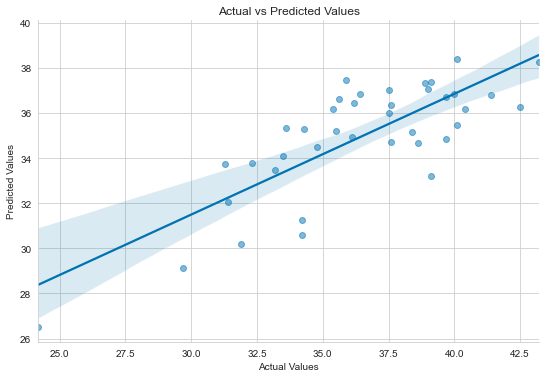

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid') 
# Assuming y_test and y_pred_mlr are the actual and predicted values
model_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlr})
sns.lmplot(x='Actual', y='Predicted', data=model_df, height=5, aspect=1.5, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [30]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred_mlr)
r2 = metrics.r2_score(y_test, y_pred_mlr)
absolute_error = metrics.mean_absolute_error(y_test, y_pred_mlr)
print("Mean squared error: " , mse)
print("R-squared: " , r2)
print("Mean Absolute Error: " , absolute_error)

Mean squared error:  7.699473817004409
R-squared:  0.4599907557305889
Mean Absolute Error:  2.2296280172908136


### Sorting the datset based on high Obesity Rate 

### Can we show any realtion with the permit datset ??

In [31]:
copy_health_ranking_2022  =  health_ranking_2022
copy_health_ranking_2022
sorted_df = copy_health_ranking_2022.sort_values(by = "Obesity Rate",ascending=False)
sorted_df.head(10)

,County,Obesity Rate,Median Household Income,Percent Rural,Food Environment Index
103,Emporia City,45.7,42895,6.3,7.4
120,Petersburg City,44.6,43190,2.1,5.0
102,Danville City,43.2,36560,4.5,7.2
57,Mecklenburg,42.5,49542,77.8,7.3
106,Franklin City,42.3,47223,3.3,6.0
87,Sussex,41.6,48040,100.0,7.6
12,Brunswick,41.4,45556,75.5,7.4
54,Lunenburg,40.8,47384,100.0,8.4
14,Buckingham,40.6,49339,100.0,8.2
109,Hampton City,40.4,53719,0.2,8.1


### Obsesity vs income above 50000 

In [40]:

# filter the column using boolean indexing
above_50000 = sorted_df[sorted_df['Median Household Income'] > 50000]

# print the filtered values
print(above_50000)


                    County  Obesity Rate  Median Household Income  Percent Rural  Food Environment Index
109           Hampton City          40.4                    53719            0.2                     8.1
27                   Essex          40.1                    56134           77.3                     7.0
83             Southampton          39.7                    60441           98.0                     8.7
117      Newport News City          39.4                    60048            0.0                     7.9
71           Prince George          39.1                    75717           53.4                     8.7
64                Nottoway          38.9                    51503           52.3                     6.2
62             Northampton          38.6                    50096          100.0                     8.5
18            Charles City          38.6                    61850          100.0                     9.1
86                   Surry          38.4               

In [42]:
col_medians_above = above_50000.median(axis=0)
col_medians_above

Obesity Rate                  34.0
Median Household Income    67373.0
Percent Rural                 57.8
Food Environment Index         8.7
dtype: float64

In [ ]:
### Obsesity vs income below 50000 

In [44]:
# filter the column using boolean indexing
below_50000 = sorted_df[sorted_df['Median Household Income'] < 50000]

# print the filtered values
print(below_50000)


                County  Obesity Rate  Median Household Income  Percent Rural  Food Environment Index
103       Emporia City          45.7                    42895            6.3                     7.4
120    Petersburg City          44.6                    43190            2.1                     5.0
102      Danville City          43.2                    36560            4.5                     7.2
57         Mecklenburg          42.5                    49542           77.8                     7.3
106      Franklin City          42.3                    47223            3.3                     6.0
87              Sussex          41.6                    48040          100.0                     7.6
12           Brunswick          41.4                    45556           75.5                     7.4
54           Lunenburg          40.8                    47384          100.0                     8.4
14          Buckingham          40.6                    49339          100.0               

In [45]:
col_medians_below = above_50000.median(axis=0)
col_medians_below

Obesity Rate                  38.5
Median Household Income    44127.0
Percent Rural                 75.3
Food Environment Index         7.3
dtype: float64